# Proyecto 2. Analisis Exploratorio

## Deteccion de covid en radiografias de torax

### Integrantes
#### Cristina Bautista 161260
#### Jose Block 18935
#### Esteban Cabrera 17781

## Investigacion

---



Se realizó una breve investigación en el análisis que se lleva a cabo a la hora de analizar una radiografía, y de los datos más importantes es que se divide en 5 tipos de colores, siendo:

negro = aire

gris oscuro = grasas...

gris claro =  tejidos blandos(órganos)...

blanco opaco = huesos...

blanco brillante = metales...

Estos cinco colores se utilizan como métrica de la radiografía. Nos dan una pista de lo que es, debido a que dependiendo de la densidad de lo que sea que salga en la radiografía, el color se irá degradando a negro o blanco brillante. Se usa como punto de medida la curvatura del diafragma, cuando esta curvatura no se puede ver con claridad, puede ser varias cosas, pulmones dañados, modificaciones debido a operaciones en el cuerpo, obesidad, como las más comunes. Generalmente cuando no se puede ver el espacio o la diferencia entre los pulmones y el diafragma, se debe a que estos no tienen la densidad que deberían de tener, o sea que hay algún tipo de hinchazón u obstáculo dentro de los pulmones que cambia el color con el que se presentan.

Por otro lado se investigó si es posible determinar si se tiene covid o no con una radiografía del tórax, y se llegó a la conclusión que no se puede, lo único que ayuda a ver la radiografía es a ver la salud de los pulmones como el tejido blando que son, no aplica para los asintomáticos y solo nos ayuda a ver qué tan crítica es la condición de los pulmones, que al final es un dato se suma importancia a pesar de que no pueda asegurar un negativo de covid o positivo. 

### Situación Problemática 
Debido al coronavirus, se requiere hacer pruebas para ver si se tiene o no este virus, entre estas, se realizan radiografías de tórax para ver el estado de los pulmones y los doctores a simple vista pueden dejar pasar por alto indicios de areas afectadas por Covid.

### Problema Científico
El virus de la Covid-19, se puede diagnosticar por una prueba de PCR, uno de los problemas que se tiene con estos resultados es que obtener el resultado de la misma conlleva una larga espera. Por lo que existe otro procedimiento, la toma de radiografía del tórax, el cual puede mostrar indicios si la enfermedad a afectado a los pulmones de alguan manera. Se puede entender que para la obtención de estas placas se toman un par de minutos a comparación de una prueba de PCR, además que provee más información sobre el posible estado deteriorado de un paciente y brindar tratamiento aun más especializado para este paciente. Uno de los posibles problemas que se encuentran es el de tener una placa y por medio del ojo humano no lograr ver en su totalidad pequeños indicios de infección, por lo que implementar un programa que utilice un algoritmo y una base de datos de entrenamiento que de el resultado basado en los datos y a la vez facilite la lectura de una radiografía de tórax con datos relevantes que ayuden al doctor a analizar las radiografías de manera precisa y eficiente, sería una ayuda increíble para la detección de la enfermedad. 

### Objetivos
*   Entender los filtros y criterios que tienden a diferenciar correctamente un caso positivo de uno negativo de coronavirus.

*   Lograr tener predicciones con una precisión mayor a 80%.

*   Presentar la información útil de las radiografías para facilitar la lectura de las mismas a los doctores.


### Descripción de los datos

**train_image_level.csv:**

id
*   Descripcion: 
  *   identificador de imagen.

boxes
*   Descripcion: 
  *   listado de diccionario, incluye datos de coordenadas x, y ademas de width y height

label
*   Descripcion: 
  *   Tiene dos tipos de label
    *   opacity, si se encuentra opacidad en la imagen
    *   none 10011, no se encuentra opacidad en la imagen

(opacidad diferente de los huesos que existen en el cuerpo)

StudyInstanceUID
*   Descripcion: 
  *   Identificador de estudio, el mismo id que el de la tabla de train_study_level.csv.


**train_study_level.csv:**

id

*   Tipo: 
  *   String
  *   id
*   Descripcion
  *   identificador de un estudio

Negative for Pneumonia

*   Tipo: 
  *   int
  *   Categorica
*   Descripcion
  *   0 para positiva 
  *   1 como afirmación de que sea Negativa

Typical Appearance

*   Tipo: 
  *   int
  *   Categorica
*   Descripcion
  *   0 para negativa 
  *   1 como positiva

Indeterminate Appearance

*   Tipo: 
  *   int
  *   Categorica
*   Descripcion
  *   0 para negativa 
  *   1 como positiva

Atypical Appearance

*   Tipo: 
  *   int
  *   Categorica
*   Descripcion
  *   0 para negativa 
  *   1 como positiva


### Referencias:

MedCram - Medical Lectures Explained CLEARLY. (2018, 30 diciembre). Chest X Ray Interpretation Explained Clearly - How to read a chest Xray. YouTube. https://www.youtube.com/watch?v=rEm2HkI5UDs&t=411s


Schaefer-Prokop, C., & Prokop, M. (2020, 19 noviembre). Chest Radiography in COVID-19: No Role in Asymptomatic and Oligosymptomatic Disease. Radiology. https://pubs.rsna.org/doi/full/10.1148/radiol.2020204038


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install --upgrade matplotlib
%matplotlib inline

!pip install opencv-python
import cv2
import scipy.misc

!pip install pydicom
import pydicom as dicom
import os

!pip install tensorflow-io
import tensorflow as tf
import tensorflow_io as tfio

## Carga de datos

df1 representa al archivo 'train_image_level.csv'

df2 representa al archivo 'train_stydy_level.csv'

In [ ]:
df1 = pd.read_csv('train_image_level.csv')
df1['StudyInstanceUID'] = df1['StudyInstanceUID'].str.rstrip(' ')
df1.StudyInstanceUID = df1.StudyInstanceUID.astype(str)
df1.StudyInstanceUID = df1.StudyInstanceUID.apply(str)

In [ ]:
df2 = pd.read_csv('train_study_level.csv')
df2['id'] = df2['id'].str.replace('_study', '')
df2['id'] = df2['id'].str.rstrip(' ')
df2.id = df2.id.astype(str)
df2.id = df2.id.apply(str)

## Analisis Exploratorio

In [ ]:
df1.head()

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e


##### Hallazgo
Se realizo una inspeccion de elementos dentro de boxes, para ver si es una lista que contiene un diccionario singular o si puede contener multiples diccionarios o bounding boxes

In [ ]:
df1['boxes'][0]

"[{'x': 789.28836, 'y': 582.43035, 'width': 1026.65662, 'height': 1917.30292}, {'x': 2245.91208, 'y': 591.20528, 'width': 1094.66162, 'height': 1761.54944}]"

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6334 entries, 0 to 6333
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                6334 non-null   object
 1   boxes             4294 non-null   object
 2   label             6334 non-null   object
 3   StudyInstanceUID  6334 non-null   object
dtypes: object(4)
memory usage: 198.1+ KB


In [ ]:
df2.head()

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852,0,1,0,0
1,000c9c05fd14,0,0,0,1
2,00292f8c37bd,1,0,0,0
3,005057b3f880,1,0,0,0
4,0051d9b12e72,0,0,0,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6054 entries, 0 to 6053
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        6054 non-null   object
 1   Negative for Pneumonia    6054 non-null   int64 
 2   Typical Appearance        6054 non-null   int64 
 3   Indeterminate Appearance  6054 non-null   int64 
 4   Atypical Appearance       6054 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 236.6+ KB


##### **Hallazgo** 

El StudyInstanceUID del DataFrame df1 es compatible con el id del DataFrame df2, por lo que se puede hacer merge, para unir ambos DataFrames en uno solo.

In [ ]:
df = pd.merge(df1, df2, left_on='StudyInstanceUID', right_on='id', how='inner')

In [ ]:
df.head()

,id_x,boxes,label,StudyInstanceUID,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,5776db0cec75,0,1,0,0
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,ff0879eb20ed,1,0,0,0
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,9d514ce429a7,0,1,0,0
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,28dddc8559b2,0,0,0,1
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,dfd9fdd85a3e,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6334 entries, 0 to 6333
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_x                      6334 non-null   object
 1   boxes                     4294 non-null   object
 2   label                     6334 non-null   object
 3   StudyInstanceUID          6334 non-null   object
 4   id_y                      6334 non-null   object
 5   Negative for Pneumonia    6334 non-null   int64 
 6   Typical Appearance        6334 non-null   int64 
 7   Indeterminate Appearance  6334 non-null   int64 
 8   Atypical Appearance       6334 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 494.8+ KB


In [ ]:
duplicate = df[df.duplicated('StudyInstanceUID')]
duplicate

,id_x,boxes,label,StudyInstanceUID,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
23,cada5310214b_image,"[{'x': 981.75034, 'y': 256.08181, 'width': 225...",opacity 1 981.75034 256.08181 1207.54099 765.2...,1a58b43cf286,1a58b43cf286,0,1,0,0
26,0d4d6acc9ed3_image,NaN,none 1 0 0 1 1,74ba8f2badcb,74ba8f2badcb,1,0,0,0
27,93a881fb3292_image,NaN,none 1 0 0 1 1,74ba8f2badcb,74ba8f2badcb,1,0,0,0
28,cdd9e3aaf45a_image,NaN,none 1 0 0 1 1,74ba8f2badcb,74ba8f2badcb,1,0,0,0
32,b3ffe59e37c7_image,NaN,none 1 0 0 1 1,81f6b4b343f7,81f6b4b343f7,0,1,0,0
...,...,...,...,...,...,...,...,...,...
5143,d4600028f75c_image,"[{'x': 399.19174, 'y': 226.69307, 'width': 827...",opacity 1 399.19174 226.69307 1226.20168999999...,8b18f1963aff,8b18f1963aff,0,1,0,0
5166,df3d32c8df06_image,NaN,none 1 0 0 1 1,b40f174f19a6,b40f174f19a6,0,0,1,0
5314,f4847d161683_image,"[{'x': 702.27444, 'y': 610.99231, 'width': 786...",opacity 1 702.27444 610.99231 1488.39055 1746....,6f6cf201e2e9,6f6cf201e2e9,0,1,0,0
5603,dfd9078a4c6d_image,NaN,none 1 0 0 1 1,f5c94b5db0cd,f5c94b5db0cd,0,1,0,0


In [ ]:
duplicate2 = df[df.duplicated('id_y')]
duplicate2

,id_x,boxes,label,StudyInstanceUID,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
23,cada5310214b_image,"[{'x': 981.75034, 'y': 256.08181, 'width': 225...",opacity 1 981.75034 256.08181 1207.54099 765.2...,1a58b43cf286,1a58b43cf286,0,1,0,0
26,0d4d6acc9ed3_image,NaN,none 1 0 0 1 1,74ba8f2badcb,74ba8f2badcb,1,0,0,0
27,93a881fb3292_image,NaN,none 1 0 0 1 1,74ba8f2badcb,74ba8f2badcb,1,0,0,0
28,cdd9e3aaf45a_image,NaN,none 1 0 0 1 1,74ba8f2badcb,74ba8f2badcb,1,0,0,0
32,b3ffe59e37c7_image,NaN,none 1 0 0 1 1,81f6b4b343f7,81f6b4b343f7,0,1,0,0
...,...,...,...,...,...,...,...,...,...
5143,d4600028f75c_image,"[{'x': 399.19174, 'y': 226.69307, 'width': 827...",opacity 1 399.19174 226.69307 1226.20168999999...,8b18f1963aff,8b18f1963aff,0,1,0,0
5166,df3d32c8df06_image,NaN,none 1 0 0 1 1,b40f174f19a6,b40f174f19a6,0,0,1,0
5314,f4847d161683_image,"[{'x': 702.27444, 'y': 610.99231, 'width': 786...",opacity 1 702.27444 610.99231 1488.39055 1746....,6f6cf201e2e9,6f6cf201e2e9,0,1,0,0
5603,dfd9078a4c6d_image,NaN,none 1 0 0 1 1,f5c94b5db0cd,f5c94b5db0cd,0,1,0,0


##### Hallazgo

Para un mismo estudio (StudyInstanceUID/id_y) pueden incluirse multiples distintas imagenes (id_x)

In [ ]:
df[df.eq('74ba8f2badcb').any(1)]

,id_x,boxes,label,StudyInstanceUID,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
25,00e3a7e91a34_image,NaN,none 1 0 0 1 1,74ba8f2badcb,74ba8f2badcb,1,0,0,0
26,0d4d6acc9ed3_image,NaN,none 1 0 0 1 1,74ba8f2badcb,74ba8f2badcb,1,0,0,0
27,93a881fb3292_image,NaN,none 1 0 0 1 1,74ba8f2badcb,74ba8f2badcb,1,0,0,0
28,cdd9e3aaf45a_image,NaN,none 1 0 0 1 1,74ba8f2badcb,74ba8f2badcb,1,0,0,0


##### Hallazgo

Por la tabla y la gráfica se puede ver que el dataset no es uniforme ya que las muestras no son 50% con label de opacity y 50% con label de none 10011, en realidad las 2/3 del dataset son de label opacity y 1/3 es de label none 10011

In [ ]:
dfLabel = df.loc[df['label'] == 'none 1 0 0 1 1']
dfLabelShape = dfLabel.shape[0]
dfShape = df.shape[0]
dfShape = dfShape - dfLabelShape
dfProportion = pd.DataFrame({
    'Labels' : ['Opacity', 'None'],
    'Contador' : [dfShape, dfLabelShape],
    'Proporcion' : [(100*dfShape/df.shape[0]), (100*dfLabelShape/df.shape[0])],
},
index=['Opacity', 'None'])
dfProportion

,Labels,Contador,Proporcion
Opacity,Opacity,4294,67.792864
None,None,2040,32.207136


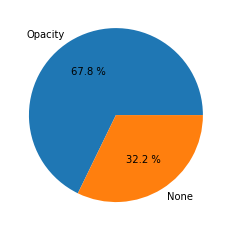

In [ ]:
plt.pie(dfProportion.Contador, labels=dfProportion.Labels, autopct="%0.1f %%")
plt.show()

#### Dataset Completo Proporciones

In [ ]:
colNegPneu = df['Negative for Pneumonia'].value_counts()
colTypApp = df['Typical Appearance'].value_counts()
colIntApp = df['Indeterminate Appearance'].value_counts()
colAtyApp = df['Atypical Appearance'].value_counts()

In [ ]:
proportionsComplete = {
    'Nombres de Columnas' : ['Negative for Pneumonia', 'Negative for Pneumonia', 'Typical Appearance', 'Typical Appearance', 
                             'Indeterminate Appearance', 'Indeterminate Appearance', 'Atypical Appearance', 'Atypical Appearance'],
    'Metricas' : [0,1,0,1,0,1,0,1],
    'Contador' : [],
    'Proporciones' : []
}

In [ ]:
listColumns = [colNegPneu, colTypApp, colIntApp, colAtyApp]
listColumnsNames = ['Negative for Pneumonia', 'Typical Appearance', 'Indeterminate Appearance', 'Atypical Appearance']
listCounter = []
listProportions = []
for i in range(len(listColumnsNames)):
    a = (100*listColumns[i][0])/sum(listColumns[i])
    listCounter.append(listColumns[i][0])
    print("La proporcion de 0's en ", listColumnsNames[i], "es: \t", a)
    listProportions.append(a)
    b = (100*listColumns[i][1])/sum(listColumns[i])
    listCounter.append(listColumns[i][1])
    print("La proporcion de 1's en ", listColumnsNames[i], "es: \t", b)
    listProportions.append(b)
proportionsComplete['Contador'] = listCounter
proportionsComplete['Proporciones'] = listProportions

La proporcion de 0's en  Negative for Pneumonia es: 	 72.5923586990843
La proporcion de 1's en  Negative for Pneumonia es: 	 27.407641300915692
La proporcion de 0's en  Typical Appearance es: 	 52.526049889485314
La proporcion de 1's en  Typical Appearance es: 	 47.473950110514686
La proporcion de 0's en  Indeterminate Appearance es: 	 82.50710451531418
La proporcion de 1's en  Indeterminate Appearance es: 	 17.49289548468582
La proporcion de 0's en  Atypical Appearance es: 	 92.3744868961162
La proporcion de 1's en  Atypical Appearance es: 	 7.625513103883802


**Tabla de proporciones sobre las diferentes clases entre negativo neumonía e indices de posible Covid**

En esta tabla se muestra las proporciones de cada clase en los casos que sean positivos (1) o negativos (0)

##### Hallazgo
En lo que se demuestra que hay un total de 4598 casos de Pneumonia, por lo que el 72.59% del dataset completo tiene algun indicio de posible Covid-19

In [ ]:
# Visto en tabla
proportionsComplete = pd.DataFrame(proportionsComplete)
proportionsComplete

,Nombres de Columnas,Metricas,Contador,Proporciones
0,Negative for Pneumonia,0,4598,72.592359
1,Negative for Pneumonia,1,1736,27.407641
2,Typical Appearance,0,3327,52.526050
3,Typical Appearance,1,3007,47.473950
4,Indeterminate Appearance,0,5226,82.507105
5,Indeterminate Appearance,1,1108,17.492895
6,Atypical Appearance,0,5851,92.374487
7,Atypical Appearance,1,483,7.625513


**Gráficas de barra de frecuencia de 'Negative for Pneumonia'**

Como se puede observar en esta gráfica existen 4598 casos en las que no se cumple la clase y 1736 en los que sí.

([Text(0, 0, '4598'), Text(0, 0, '1736')],)

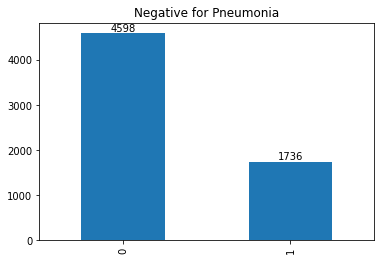

In [ ]:
ax = colNegPneu.plot.bar()
ax.set_title(listColumnsNames[0])
ax.bar_label(ax.containers[0]),

**Gráficas de barra de frecuencia de 'Typical Appearance'**

Como se puede observar en esta gráfica existen 3327 casos en las que no se cumple la clase y 3007 en los que sí.


[Text(0, 0, '3327'), Text(0, 0, '3007')]

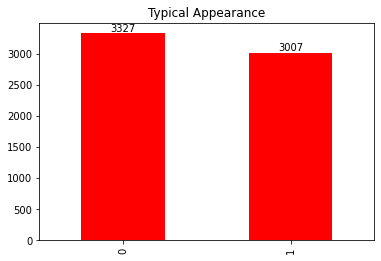

In [ ]:
ax = colTypApp.plot.bar(color='red')
ax.set_title(listColumnsNames[1])
ax.bar_label(ax.containers[0])

**Gráficas de barra de frecuencia de 'Indeterminate Appearance'**

Como se puede observar en esta gráfica existen 5226 casos en las que no se cumple la clase y 1108 en los que sí.

[Text(0, 0, '5226'), Text(0, 0, '1108')]

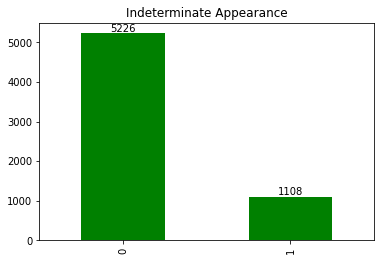

In [ ]:
ax = colIntApp.plot.bar(color='green')
ax.set_title(listColumnsNames[2])
ax.bar_label(ax.containers[0])

**Gráficas de barra de frecuencia de 'Atypical Appearance'**

Como se puede observar en esta gráfica existen 5851 casos en las que no se cumple la clase y 483 en los que sí.

[Text(0, 0, '5851'), Text(0, 0, '483')]

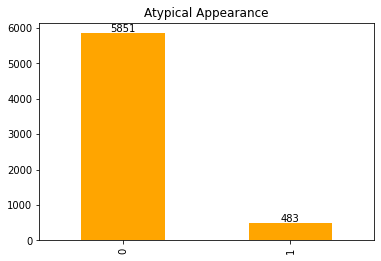

In [ ]:
ax = colAtyApp.plot.bar(color='orange')
ax.set_title(listColumnsNames[3])
ax.bar_label(ax.containers[0])

**Gráfica de pie sobre las diferentes clases entre negativo neumonía e indices de posible Covid (dataset completo)**

Como se puede observar, la clase 'typical appearance' predomina ante todas. Por consiguiente, la otra clase más común es la 'negative for pneumonia'. Luego le sigue la clase 'indeterminate appearance'. Finalmente, la menos comun es 'atypical appearance'. Podemos inferir que los titulos de las clases van acorde a su porcentaje precentado.

([<matplotlib.patches.Wedge at 0x7f6063210bd0>,
 [Text(0.7168168491529645, 0.8343701844927204, 'Negative for Pneumonia'),
  Text(-1.0971564952719262, -0.07904191851558096, 'Typical Appearance'),
  Text(0.5675442945704217, -0.9422809950861593, 'Indeterminate Appearance'),
  Text(1.068586002736162, -0.26100566039140105, 'Atypical Appearance')])

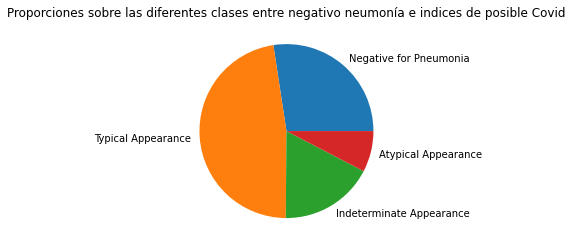

In [ ]:
count_values = [colNegPneu[1], colTypApp[1], colIntApp[1], colAtyApp[1]]
labels_values = ['Negative for Pneumonia', 'Typical Appearance', 'Indeterminate Appearance', 'Atypical Appearance']

plt.axis('equal')
plt.title('Proporciones sobre las diferentes clases entre negativo neumonía e indices de posible Covid')
plt.pie(count_values, labels=labels_values)

#### Dataset filtrado por none 10011 Proporciones

In [ ]:
df1.loc[df1['label'] == 'none 1 0 0 1 1']

,id,boxes,label,StudyInstanceUID
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed
6,0023f02ae886_image,NaN,none 1 0 0 1 1,2fa400b873f5
22,00c1515729a8_image,NaN,none 1 0 0 1 1,1a58b43cf286
24,00e3a7e91a34_image,NaN,none 1 0 0 1 1,74ba8f2badcb
26,010214f9b600_image,NaN,none 1 0 0 1 1,2a7b4e669dda
...,...,...,...,...
6322,ff7659762b75_image,NaN,none 1 0 0 1 1,4aa11ef1fd38
6324,ff9f10a24c27_image,NaN,none 1 0 0 1 1,a937614104e3
6325,ffa9fef3c7bf_image,NaN,none 1 0 0 1 1,5133bbb7b75c
6329,ffcc6edd9445_image,NaN,none 1 0 0 1 1,7e6c68462e06


In [ ]:
dfLabel

,id_x,boxes,label,StudyInstanceUID,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,ff0879eb20ed,1,0,0,0
6,0023f02ae886_image,NaN,none 1 0 0 1 1,2fa400b873f5,2fa400b873f5,1,0,0,0
22,00c1515729a8_image,NaN,none 1 0 0 1 1,1a58b43cf286,1a58b43cf286,0,1,0,0
25,00e3a7e91a34_image,NaN,none 1 0 0 1 1,74ba8f2badcb,74ba8f2badcb,1,0,0,0
26,0d4d6acc9ed3_image,NaN,none 1 0 0 1 1,74ba8f2badcb,74ba8f2badcb,1,0,0,0
...,...,...,...,...,...,...,...,...,...
6322,ff7659762b75_image,NaN,none 1 0 0 1 1,4aa11ef1fd38,4aa11ef1fd38,1,0,0,0
6324,ff9f10a24c27_image,NaN,none 1 0 0 1 1,a937614104e3,a937614104e3,1,0,0,0
6325,ffa9fef3c7bf_image,NaN,none 1 0 0 1 1,5133bbb7b75c,5133bbb7b75c,1,0,0,0
6329,ffcc6edd9445_image,NaN,none 1 0 0 1 1,7e6c68462e06,7e6c68462e06,1,0,0,0


In [ ]:
colNegPneuLabel = dfLabel['Negative for Pneumonia'].value_counts()
colTypAppLabel = dfLabel['Typical Appearance'].value_counts()
colIntAppLabel = dfLabel['Indeterminate Appearance'].value_counts()
colAtyAppLabel = dfLabel['Atypical Appearance'].value_counts()

In [ ]:
proportionsCompleteNone = {
    'Nombres de Columnas' : ['Negative for Pneumonia', 'Negative for Pneumonia', 'Typical Appearance', 'Typical Appearance', 
                             'Indeterminate Appearance', 'Indeterminate Appearance', 'Atypical Appearance', 'Atypical Appearance'],
    'Metricas' : [0,1,0,1,0,1,0,1],
    'Contador' : [],
    'Proporciones' : []
}

In [ ]:
listColumns = [colNegPneuLabel, colTypAppLabel, colIntAppLabel, colAtyAppLabel]
listColumnsNames = ['Negative for Pneumonia', 'Typical Appearance', 'Indeterminate Appearance', 'Atypical Appearance']
listCounter = []
listProportions = []
for i in range(len(listColumnsNames)):
    a = (100*listColumns[i][0])/sum(listColumns[i])
    listCounter.append(listColumns[i][0])
    print("La proporcion de 0's en ", listColumnsNames[i], "es: \t", a)
    listProportions.append(a)
    b = (100*listColumns[i][1])/sum(listColumns[i])
    listCounter.append(listColumns[i][1])
    print("La proporcion de 1's en ", listColumnsNames[i], "es: \t", b)
    listProportions.append(b)
proportionsCompleteNone['Contador'] = listCounter
proportionsCompleteNone['Proporciones'] = listProportions

La proporcion de 0's en  Negative for Pneumonia es: 	 14.901960784313726
La proporcion de 1's en  Negative for Pneumonia es: 	 85.09803921568627
La proporcion de 0's en  Typical Appearance es: 	 92.5
La proporcion de 1's en  Typical Appearance es: 	 7.5
La proporcion de 0's en  Indeterminate Appearance es: 	 97.1078431372549
La proporcion de 1's en  Indeterminate Appearance es: 	 2.892156862745098
La proporcion de 0's en  Atypical Appearance es: 	 95.49019607843137
La proporcion de 1's en  Atypical Appearance es: 	 4.509803921568627


**Tabla de proporciones sobre las diferentes clases entre negativo neumonía e indices de posible Covid**


En esta tabla se muestra las proporciones de cada clase en los casos que sean positivos (1) o negativos (0)

##### Hallazgo
Dentro del filtro de label = none 10011, se encontro que el 304 casos que equivalen al 14.90% del filtro si tienen Pneumonia y algun indicio de posible Covid-19

In [ ]:
# Visto en tabla
proportionsCompleteNone = pd.DataFrame(proportionsCompleteNone)
proportionsCompleteNone

,Nombres de Columnas,Metricas,Contador,Proporciones
0,Negative for Pneumonia,0,304,14.901961
1,Negative for Pneumonia,1,1736,85.098039
2,Typical Appearance,0,1887,92.500000
3,Typical Appearance,1,153,7.500000
4,Indeterminate Appearance,0,1981,97.107843
5,Indeterminate Appearance,1,59,2.892157
6,Atypical Appearance,0,1948,95.490196
7,Atypical Appearance,1,92,4.509804


**Gráficas de barra de frecuencia de 'Negative for Pneumonia'**

Como se puede observar en esta gráfica existen 1736 casos en las que no se cumple la clase y 304 en los que sí.

[Text(0, 0, '1736'), Text(0, 0, '304')]

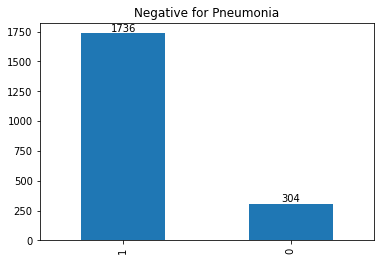

In [ ]:
ax = colNegPneuLabel.plot.bar()
ax.set_title(listColumnsNames[0])
ax.bar_label(ax.containers[0])

**Gráficas de barra de frecuencia de 'Typical Appearance'**

Como se puede observar en esta gráfica existen 1887 casos en las que no se cumple la clase y 153 en los que sí.

[Text(0, 0, '1887'), Text(0, 0, '153')]

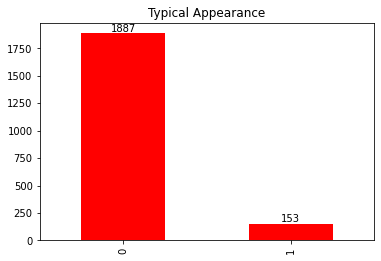

In [ ]:
ax = colTypAppLabel.plot.bar(color='red')
ax.set_title(listColumnsNames[1])
ax.bar_label(ax.containers[0])

**Gráficas de barra de frecuencia de 'Indeterminate Appearance'**

Como se puede observar en esta gráfica existen 1981 casos en las que no se cumple la clase y 59 en los que sí.

[Text(0, 0, '1981'), Text(0, 0, '59')]

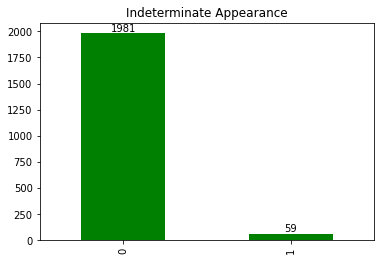

In [ ]:
ax = colIntAppLabel.plot.bar(color='green')
ax.set_title(listColumnsNames[2])
ax.bar_label(ax.containers[0])

**Gráficas de barra de frecuencia de 'Atypical Appearance'**

Como se puede observar en esta gráfica existen 1948 casos en las que no se cumple la clase y 92 en los que sí.

[Text(0, 0, '1948'), Text(0, 0, '92')]

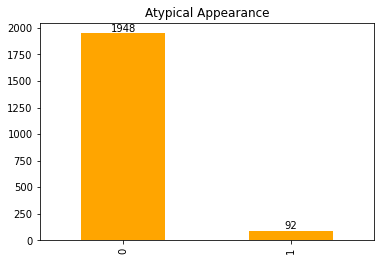

In [ ]:
ax = colAtyAppLabel.plot.bar(color='orange')
ax.set_title(listColumnsNames[3])
ax.bar_label(ax.containers[0])

**Gráfica de pie sobre las diferentes clases entre negativo neumonía e indices de posible Covid (filtro de label = none 10011)**

Como se puede observar, la clase 'Negative for Pneumonia' predomina ante todas. Por consiguiente, la otra clase más común es la 'Atypical Appearance'. Luego le sigue la clase 'Indeterminate Appearance'. Finalmente, la menos comun es 'Indeterminate appearance'.

([<matplotlib.patches.Wedge at 0x7f60699a2e10>,
 [Text(-0.9816406554236289, 0.49636843535771735, 'Negative for Pneumonia'),
  Text(0.8408313606266763, -0.7092267782498716, 'Typical Appearance'),
  Text(1.0238727165540078, -0.40210031123628415, 'Indeterminate Appearance'),
  Text(1.0889782468275286, -0.1553266813411081, 'Atypical Appearance')])

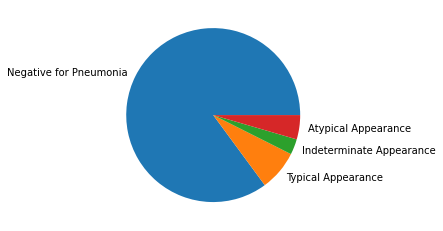

In [ ]:
count_values = [colNegPneuLabel[1], colTypAppLabel[1], colIntAppLabel[1], colAtyAppLabel[1]]
labels_values = ['Negative for Pneumonia', 'Typical Appearance', 'Indeterminate Appearance', 'Atypical Appearance']

plt.axis('equal')
plt.pie(count_values, labels=labels_values)

Referencias: https://www.tensorflow.org/io/tutorials/dicom

**Despliegue de imagenes a analizar**

Despliegue de imagenes a analizar  En esta sección se despliega un conjunto de 20 imangenes del data set en las que se presentan rayos X del tórax a diferentes pacientes que cuentan con una de las diferentes clases de neumonía. Por el momento no es posible categorizarlas según la escala de grises debido a que ninguna de ellas contiene información sobre que de caso se trata. Es decir, para poder entrenar una red para separarlas en categorías, se deberían tener muestras confirmadas de casos existentes para 'Atypical Appearance', 'Indeterminate Appearance', 'Typical Appearance' y  'Negative Appearance'. Cada imagen se decodifica para encontrar la imagen sin perdida y con perdida de información, cosa que podría afectar el resultado de una red al momento de entrenarla.

TypeError: ignored

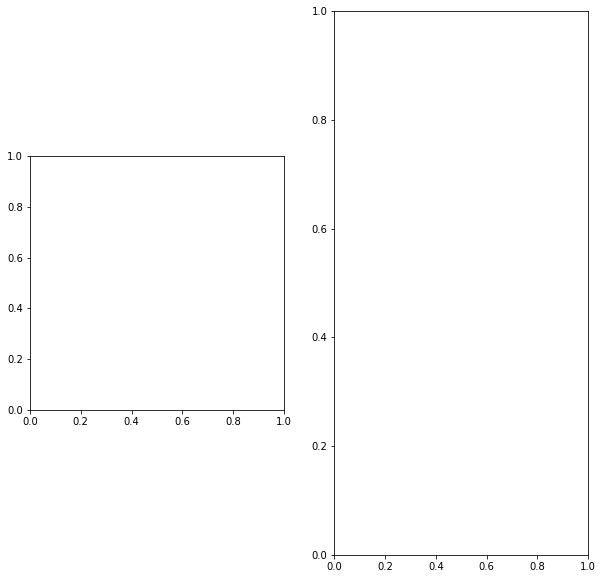

In [ ]:
for n in os.listdir('./Images'):
    if n == 'desktop.ini':
        nada=0
    else:
        image_sample = tf.io.read_file("./Images/{}".format(n))

        img = tfio.image.decode_dicom_image(image_sample, dtype=tf.uint16)

        sk = tfio.image.decode_dicom_image(image_sample, on_error='skip', dtype=tf.uint8)

        image_with_loss = tfio.image.decode_dicom_image(image_sample, scale='auto', on_error='lossy', dtype=tf.uint8)


        fig, axes = plt.subplots(1,2, figsize=(10,10))
        axes[0].imshow(np.squeeze(img.numpy()), cmap='gray')
        axes[0].set_title('imagen')
        axes[1].imshow(np.squeeze(image_with_loss.numpy()), cmap='gray')
        axes[1].set_title('image with loss')

## Conclusiones



*   Se encontró que la información Opacity y None no está uniformemente distribuida entre ambas variables. Es decir, la mayoría de imágenes muestran unos rayos X de pulmones de pacientes afectados por COVID-19.
*   Los resultados encontrados en la distribución de los tipos de clases de neumonía que aparecen en las imágenes muestran que: la 'typical pneumonia' predomina, le sigue 'negative pneumonia', luego 'ideterminate pneumonia' y por último 'atypical pneumonia'.


*   El conjunto de datos (imágenes) no estaban clasificadas previamente, por lo cual no es posible crear una red neuronal para poder clasificar otras muestras de manera automática.


*   Las imágenes deslpegadas deberían de pasar por un proceso de cambios para poderlas adaptar a un modelo, ya que son imágenes grandes que pueden ser dificiles de procesar.